In [1]:
import sys
import os
import numpy as np
import pandas as pd
from scipy.special import erf
import matplotlib.pyplot as plt
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import iplot, init_notebook_mode
plotly .tools.set_credentials_file(username = 'fialhocoelho',\
                                   api_key  = 'XShJogIgb2Yjyd5MpwyT')

# PARAMETERS
input_path  = '/data/track-ml/input/TrackFakeReal.csv'
output_path = '/data/track-ml/output/'

# Open the input file as a DF
df = pd.read_csv(input_path)

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


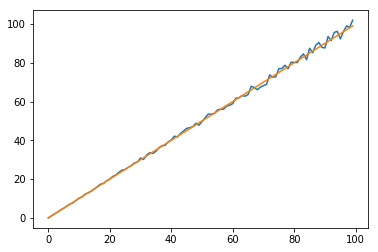

In [2]:
from scipy import special
import matplotlib.pyplot as plt
import random

'''
start_err   = 0.5
end_err     = 4
len_err     = 50
input_array = np.linspace(start_err, 
                          end_err, len_err)
err_array   = special.erf(input_array)
'''
def peteleco(position, err, len_err = 50):

    err_array = np.linspace(1 - err, 1 + err, len_err)
    value_err = position * random.choice(err_array)
    
    return value_err



#print(input_array)
x = []
k = 100
for i in range(k): 
    value = peteleco(i, 0.03, 100)
    #print(str(i) + ': ' + str(value))
    x.append(value)

plt.plot(range(k),x)
plt.plot(range(k),range(k))

plt.show()


In [3]:
# Creating a DF with hits data
df_hits = df.iloc[:,1:-1]
print('Shape of df_hits:    ' + str(df_hits.shape))

# Creating a DF with true of fake info
df_is_real = df.iloc[:,-1]
print('Shape of df_is_real: ' + str(df_is_real.shape))

Shape of df_hits:    (16860, 120)
Shape of df_is_real: (16860,)


In [4]:
# particles 6 fields
# hit id 6 fields x 19 -> maximum amount of hits = 114
# 1 - output => 0 real 1 fake

# Initializing DF for x,y,z values
xyz_dim = (df_hits.shape[0], int(df_hits.shape[1]/2))
df_hits_xyz_2d = pd.DataFrame(np.zeros(xyz_dim))

# Initializing list of indexes
selected_columns = np.zeros(int(df_hits.shape[1]/2))

# Generating indexes
for i in range(int(df_hits_xyz_2d.shape[1]/3)):
    selected_columns[3*i:3*i+3] = list(range(6*i, 6*i+3))

print('selected_columns xyz of df_hits:\n\n' + str(selected_columns) + \
      '\n\n len of selected_columns: ' + str(len(selected_columns)))

# Geting a single DF with x,y,z values from df_hits[indexes]
df_hits_xyz_2d = df_hits.iloc[:,selected_columns]

# Generating HDF5 file from DF
#df_hits_xyz_2d.to_hdf(output_path + 'df_hits_xyz_2d.h5', key = 'df', mode = 'w')

selected_columns xyz of df_hits:

[  0.   1.   2.   6.   7.   8.  12.  13.  14.  18.  19.  20.  24.  25.
  26.  30.  31.  32.  36.  37.  38.  42.  43.  44.  48.  49.  50.  54.
  55.  56.  60.  61.  62.  66.  67.  68.  72.  73.  74.  78.  79.  80.
  84.  85.  86.  90.  91.  92.  96.  97.  98. 102. 103. 104. 108. 109.
 110. 114. 115. 116.]

 len of selected_columns: 60


In [5]:
#creating df with x, y and z positions

len_xyz = int(len(selected_columns)/3)

# Initializing lists of indexes
selected_columns_x = np.zeros(len_xyz)
selected_columns_y = np.zeros(len_xyz)
selected_columns_z = np.zeros(len_xyz)

# Generating indexes
for i in range(len_xyz):
    selected_columns_x[i] = int(i*3)
    selected_columns_y[i] = int(i*3+1)
    selected_columns_z[i] = int(i*3+2)

# Printing indexes for evaluation 
print('selected_columns of x values from df_hits:\n' + \
      str(selected_columns_x) + \
      '\n\nselected_columns of y values from df_hits:\n' + \
      str(selected_columns_y) + \
      '\n\nselected_columns of z values from df_hits:\n' + \
      str(selected_columns_z) + \
      '\n\n len of selected_columns x,y,z: ' + \
      str(len(selected_columns_x)) + ', ' +
      str(len(selected_columns_x)) + ', ' +
      str(len(selected_columns_x)))

# Geting x,y,z values from df_hits_xyz_2d[indexes]
df_hits_x = df_hits_xyz_2d.iloc[:,selected_columns_x]
df_hits_y = df_hits_xyz_2d.iloc[:,selected_columns_y]
df_hits_z = df_hits_xyz_2d.iloc[:,selected_columns_z]

# Generating HDF5 files from DFs
df_hits_x.to_hdf(output_path + 'df_hits_x.h5', key = 'df', mode = 'w')
df_hits_y.to_hdf(output_path + 'df_hits_y.h5', key = 'df', mode = 'w')
df_hits_z.to_hdf(output_path + 'df_hits_z.h5', key = 'df', mode = 'w')

selected_columns of x values from df_hits:
[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42. 45. 48. 51.
 54. 57.]

selected_columns of y values from df_hits:
[ 1.  4.  7. 10. 13. 16. 19. 22. 25. 28. 31. 34. 37. 40. 43. 46. 49. 52.
 55. 58.]

selected_columns of z values from df_hits:
[ 2.  5.  8. 11. 14. 17. 20. 23. 26. 29. 32. 35. 38. 41. 44. 47. 50. 53.
 56. 59.]

 len of selected_columns x,y,z: 20, 20, 20


In [9]:
# number of tracks
n_track = 2

# To plot All the tracks
# n_track = df_hits.shape[0]
# !!!It Will be very time consuming !!!

color_real      = 'orange'
color_fake      = 'green'
plot_name       = 'plot_track_real_fake'
plot_extension  = '.webp'

# list os data to plot
data = []
track = [None] * n_track

# loop to create the color_fake traces of fake tracks (df_is_real.iloc[i] == 1.0),
# or/and the color_real traces of real tracks (df_is_real.iloc[i] == 0.0)
for i in range(n_track):
    # TRUE
    if df_is_real.iloc[i] == 0.0:
        track[i] = go.Scatter3d(
            # Removing null values (zeroes) in the plot
            x = df_hits_x.replace(0.0, np.nan).iloc[i,:],
            y = df_hits_y.replace(0.0, np.nan).iloc[i,:],
            z = df_hits_z.replace(0.0, np.nan).iloc[i,:],
            # x,y,z data with null values (zeroes)
            #
            # x = df_hits_x.iloc[i,:],
            # y = df_hits_y.iloc[i,:],
            # z = df_hits_z.iloc[i,:],
            marker = dict(
                size = 1,
                color = color_real,
            ),
            line = dict(
                color = color_real,
                width = 1
            )
        )
        # append the track[i] in the list for plotting
        data.append(track[i])
    # TO PLOT  REAL TRACKS, UNCOMMENT THE FOLLOWING SNIPPET
    '''
    else:
        track[i] = go.Scatter3d(
            # Removing null values (zeroes) in the plot
            x = df_hits_x.replace(0.0, np.nan).iloc[i,:],
            y = df_hits_y.replace(0.0, np.nan).iloc[i,:],
            z = df_hits_z.replace(0.0, np.nan).iloc[i,:],
            # x,y,z data with null values (zeroes)
            #
            # x = df_hits_x.iloc[i,:],
            # y = df_hits_y.iloc[i,:],
            # z = df_hits_z.iloc[i,:],
            marker = dict(
                size = 1,
                color = color_fake,
            ),
            line = dict(
                color = color_fake,
                width = 1
            )
        )
        # append the track[i] in the list for plotting
        data.append(track[i])
    '''
layout = dict(
    width    = 900,
    height   = 750,
    autosize = False,
    title    ='Tracking real x fake',
    scene = dict(
        xaxis = dict(
            gridcolor       = 'rgb(255, 255, 255)',
            zerolinecolor   = 'rgb(255, 255, 255)',
            showbackground  = True,
            backgroundcolor = 'rgb(230, 230,230)',
            title           ='x (mm)'
        ),
        yaxis=dict(
            gridcolor       = 'rgb(255, 255, 255)',
            zerolinecolor   = 'rgb(255, 255, 255)',
            showbackground  = True,
            backgroundcolor = 'rgb(230, 230,230)',
            title           = 'y (mm)'
        ),
        zaxis=dict(
            gridcolor       = 'rgb(255, 255, 255)',
            zerolinecolor   = 'rgb(255, 255, 255)',
            showbackground  = True,
            backgroundcolor = 'rgb(230, 230,230)',
            title           = 'z (mm)'
        ),
        camera = dict(
            up = dict(
                x = 0,
                y = 0,
                z = 1
            ),
            eye = dict(
                x = -1.7428,
                y = 1.0707,
                z = 0.7100,
            )
        ),
        aspectratio = dict( x = 1, y = 1, z = 0.7),
        aspectmode = 'manual'
    ),
)

fig = dict(data = data, layout = layout)

py.iplot(fig, filename='plot_track_real_fake', height=700)

In [7]:
# CHECK WHY DOESNT WORK!  COS theta phi

#print(output_path+plot_name+plot_extension)
#df_hits_xyz_2d.iloc[:,3*i:3*i+2] = df_hits.iloc[:,6*i:6*i+2]